In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

In [4]:
df = pd.read_csv('carprices.csv')
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


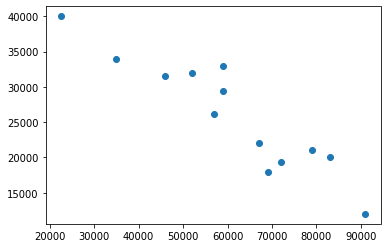

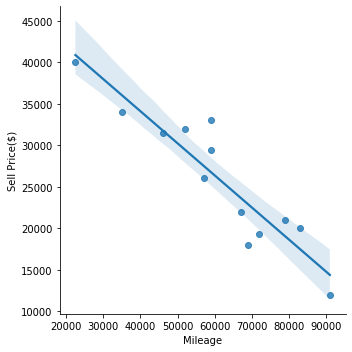

In [16]:
plt.scatter(df.Mileage, df['Sell Price($)'])
sns.lmplot('Mileage', 'Sell Price($)', data=df)

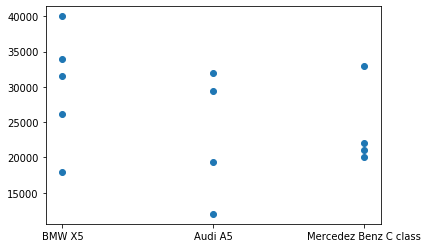

In [9]:
plt.scatter(df['Car Model'], df['Sell Price($)'])

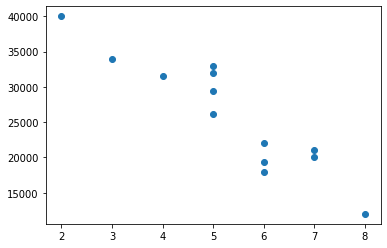

In [8]:
plt.scatter(df['Age(yrs)'], df['Sell Price($)'])

In [44]:
cars = pd.get_dummies(df['Car Model'])

In [48]:
final = pd.concat([df,cars],axis=1).drop('Car Model', axis=1)

In [50]:
final.drop('Mercedez Benz C class', axis=1, inplace=True)


In [68]:
final

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [57]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
x = final[['Mileage', 'Age(yrs)', 'Audi A5', 'BMW X5']].values
y = final['Sell Price($)']

In [62]:
x

array([[69000,     6,     0,     1],
       [35000,     3,     0,     1],
       [57000,     5,     0,     1],
       [22500,     2,     0,     1],
       [46000,     4,     0,     1],
       [59000,     5,     1,     0],
       [52000,     5,     1,     0],
       [72000,     6,     1,     0],
       [91000,     8,     1,     0],
       [67000,     6,     0,     0],
       [83000,     7,     0,     0],
       [79000,     7,     0,     0],
       [59000,     5,     0,     0]], dtype=int64)

In [61]:
reg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
reg.predict([[45000,4,0,0]])

array([36991.31721061])

In [66]:
reg.score(x,y)

0.9417050937281083

In [67]:
reg.predict([[86000,7,0,1]])

array([11080.74313219])